In [2]:
from phasenet.model import PhaseNet, Config, Data
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
/Users/dsaha/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## The phasenet model can be trained using the following three steps: 

### STEP 1 : Setup the config

In [3]:
from IPython.display import Markdown
import re
hlp = '### ' + Config.__doc__
def _replace(s):
    return f"  \n\n`{s.group(1).strip()}`: "
hlp = re.sub(r'\n\s*:param([^:]+):', _replace, hlp)
display(Markdown(hlp))

### Configuration for phasenet models  

`zernike_amplitude_ranges`:  dictionary or list, the values should either a scalar indicating the absolute magnitude
            or a tuple with upper and lower bound, default is {'vertical coma': (-0.2,0.2)}  

`zernike_order`:  string, zernike nomeclature used when the amplitude ranges are given as a list, default is 'noll'  

`zernike_normed`:  booelan, whether the zzernikes are normalized according, default is True  

`net_kernel_size`:  convoltuion kernel size, default is (3,3,3)  

`net_pool_size`:  max pool kernel size, default is (1,2,2)  

`net_activation`:  activation, default is 'tanh'  

`net_padding`:  padding for convolution, default is 'same'  

`psf_shape`:  tuple, shpae of the psf, default is (64,64,64)  

`psf_units`:  tuple, voxel unit (z,y,x) in um, default is (0.1,0.1,0.1)  

`psf_na_detection`:  scalar, numerical apperture default is 1.1  

`psf_lam_detection`:  scalar, wavelength in um, default is 0.5  

`psf_n`:  scalar, refractive index of immersion medium, default is 1.33  

`noise_snr`:  scalar or tuple, signal to noise ratio  

`noise_mean`:  scalar or tuple, mean background noise  

`noise_sigma`:  scalar or tuple, simga for gaussian noise  

`gaussian_blur_sigma`:  float, sigma for gaussian bluring after adding noise, default is None  

`phantom_params`:  dictionary, parameters for the chosen phantom, e.g. {'name'='sphere',radius':0.1}  

`crop_shape`:  tuple, crop shape  

`jitter`:  booelan, randomly move the center point within a given limit, default is False  

`max_jitter`:  tuple, maximum displacement for jittering, if None then it gets a default value  

`train_loss`:  string, training loss, default is 'mse'  

`train_epochs`:  integer, number of epochs for trianing, default is 400  

`train_steps_per_epoch`:  integer, number of steps per epoch, default is 5  

`train_learning_rate`:  scalar, leaning rate, default is 0.0003  

`train_batch_size`:  integer, batch size for training the network, default is 8  

`train_n_val`:  integer, number of validation data, default is 128  

`train_tensorboard`:  boolean, create tensorboard, default is True  

`planes`:  list, z planes with respect to center, if None then it takes all the planes

    

#### It is important to set the Zernike modes the network is to be trained for using the parameter zernike_amplitude_ranges. Please modify zernike_order if the Zernikes are not given in Noll index.

#### It is also important to set the psf parameters (psf_lam_detection, psf_units, psf_na_detection, psf_n) to match the physical parameters of the microscope being used 

#### For optimal performance of the PhaseNet it is advisable to set the noise charecteristics ( noise_mean, noise_sigma, noise_snr) and phantom parameters (phantom_params)

#### The training parameters (train_batch_size, train_checkpoint, train_checkpoint_epoch, train_checkpoint_last, train_learning_rate, train_loss, train_n_val, train_steps_per_epoch, train_tensorboard  can be left in its default state

#### The number of training epochs can be set in the config file using the variable train_epochs or later in STEP 3

#### The remaining parameters can be left in its default state 

In [3]:
c = Config(psf_n=8, phantom_params=None)
vars(c)

{'axes': 'ZYXC',
 'crop_shape': (32, 32, 32),
 'gaussian_blur_sigma': None,
 'jitter': True,
 'max_jitter': None,
 'model_input_shape': (32, 32, 32),
 'n_channel_in': 1,
 'n_channel_out': 1,
 'n_dim': 3,
 'net_activation': 'tanh',
 'net_kernel_size': (3, 3, 3),
 'net_padding': 'same',
 'net_pool_size': (1, 2, 2),
 'noise_mean': 100,
 'noise_sigma': 3.5,
 'noise_snr': (1.0, 5),
 'phantom_params': None,
 'planes': None,
 'psf_lam_detection': 0.5,
 'psf_n': 8,
 'psf_na_detection': 1.1,
 'psf_shape': (64, 64, 64),
 'psf_units': (0.1, 0.1, 0.1),
 'train_batch_size': 8,
 'train_checkpoint': 'weights_best.h5',
 'train_checkpoint_epoch': 'weights_now.h5',
 'train_checkpoint_last': 'weights_last.h5',
 'train_epochs': 400,
 'train_learning_rate': 0.0003,
 'train_loss': 'mse',
 'train_n_val': 128,
 'train_steps_per_epoch': 5,
 'train_tensorboard': True,
 'zernike_amplitude_ranges': {'vertical coma': (-0.2, 0.2)},
 'zernike_normed': True,
 'zernike_order': 'noll'}

## STEP 2 : Setup the model

In [4]:
model = PhaseNet(config=c, name='test', basedir='models')

## STEP 3: Train the model

In [5]:
model.train(epochs=20)

Epoch 1/20
5/5 [==============================] - 3s 642ms/step - loss: 0.0194 - val_loss: 0.0143
Epoch 2/20
5/5 [==============================] - 2s 468ms/step - loss: 0.0143 - val_loss: 0.0143
Epoch 3/20
5/5 [==============================] - 3s 523ms/step - loss: 0.0116 - val_loss: 0.0108
Epoch 4/20
5/5 [==============================] - 3s 528ms/step - loss: 0.0109 - val_loss: 0.0096
Epoch 5/20
5/5 [==============================] - 3s 556ms/step - loss: 0.0068 - val_loss: 0.0018
Epoch 6/20
5/5 [==============================] - 3s 516ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 7/20
5/5 [==============================] - 3s 524ms/step - loss: 8.5584e-04 - val_loss: 0.0020
Epoch 8/20
5/5 [==============================] - 3s 524ms/step - loss: 0.0017 - val_loss: 9.7984e-04
Epoch 9/20
5/5 [==============================] - 3s 520ms/step - loss: 4.9346e-04 - val_loss: 7.8661e-04
Epoch 10/20
5/5 [==============================] - 3s 535ms/step - loss: 3.6736e-04 - val_loss: 5.5095

### Validation on synthetic data

In [6]:
data = Data(
    batch_size           = 50,
    amplitude_ranges     = model.config.zernike_amplitude_ranges,
    order                = model.config.zernike_order,
    normed               = model.config.zernike_normed,
    psf_shape            = model.config.psf_shape,
    units                = model.config.psf_units,
    na_detection         = model.config.psf_na_detection,
    lam_detection        = model.config.psf_lam_detection,
    n                    = model.config.psf_n,
    noise_mean           = model.config.noise_mean,
    noise_snr            = model.config.noise_snr,
    noise_sigma          = model.config.noise_sigma,
    crop_shape           = model.config.crop_shape,
    jitter               = model.config.jitter,
    phantom_params       = model.config.phantom_params,
    planes               = model.config.planes,
)
psfs, amps = next(data.generator())
psfs.shape, amps.shape

((50, 32, 32, 32, 1), (50, 1))

In [7]:
amps_pred = np.array([model.predict(psf) for psf in tqdm(psfs)])

100%|██████████| 50/50 [00:00<00:00, 129.06it/s]


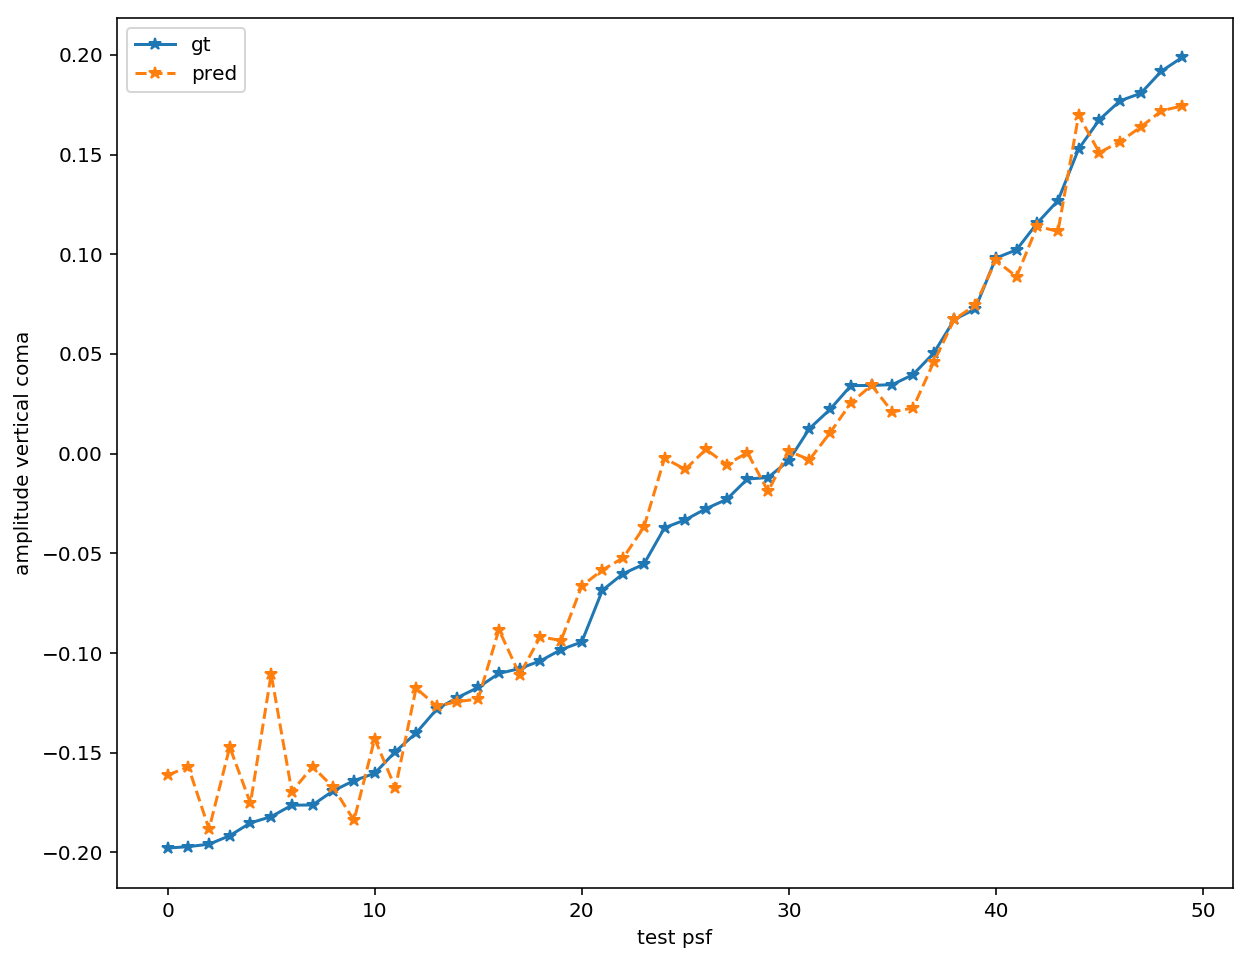

In [8]:
plt.figure(figsize=(10,8))
ind = np.argsort(amps.ravel())
plt.plot(amps[ind], marker='*', label='gt')
plt.plot(amps_pred[ind], '--', marker='*', label='pred')
# plt.hlines(-0.2, *plt.axis()[:2])
# plt.hlines(+0.2, *plt.axis()[:2])
plt.xlabel('test psf')
plt.ylabel(f'amplitude {tuple(model.config.zernike_amplitude_ranges.keys())[0]}')
plt.legend()
None;